In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from collections import Counter
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, recall_score, precision_score, f1_score

## The problem statement: To classify the mobile phone price category

In [3]:
data=pd.read_csv('Mobile prices.txt')
data

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,336,670,869,18,10,19,1,1,1,0


1. battery power: Total energy a battery can store in one time measured in mAh
2. blue: has bluetooth or not
3. clock_speed: speed at which microprocessor executes instructions
4. dual_sim: has dual sim support or not.
5. fc: Front camer mega pixels.
6. four_g: Has 4G or not
7. int_memory: Internal memory in GB
8. m_dep: Mobile Depth in cm
9. mobile_wt: Weight of mobile phone
10. n_cores: Number of cores of processor
11. pc: primary camera mega pixels
12. px_height: Pixel resolution height
13. px_width: pixel resolution width
14. ram: RAM
15. sc_h: Screen height of mobile in cm
16. sc_w: Screen width of mobile in cm
17. talk_time: longest time that a single battery charge will last when you are talking
18. three_g: 3G or not
19. touch_scrren: has touch screen or not
20. wifi: has wifi or not
21. price_range: This is the target variable with value of 0(low cost), 1(medium cost), 2(high cost) and 3(very high cost).

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

## EDA, cleaning and visualization

In [6]:
data.isna().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

In [8]:
Counter(data.price_range)

Counter({1: 500, 2: 500, 3: 500, 0: 500})

In [16]:
data.corr()['price_range'].sort_values()

touch_screen    -0.030411
mobile_wt       -0.030302
clock_speed     -0.006606
m_dep            0.000853
n_cores          0.004399
four_g           0.014772
dual_sim         0.017444
wifi             0.018785
blue             0.020573
talk_time        0.021859
fc               0.021998
sc_h             0.022986
three_g          0.023611
pc               0.033599
sc_w             0.038711
int_memory       0.044435
px_height        0.148858
px_width         0.165818
battery_power    0.200723
ram              0.917046
price_range      1.000000
Name: price_range, dtype: float64

<Axes: >

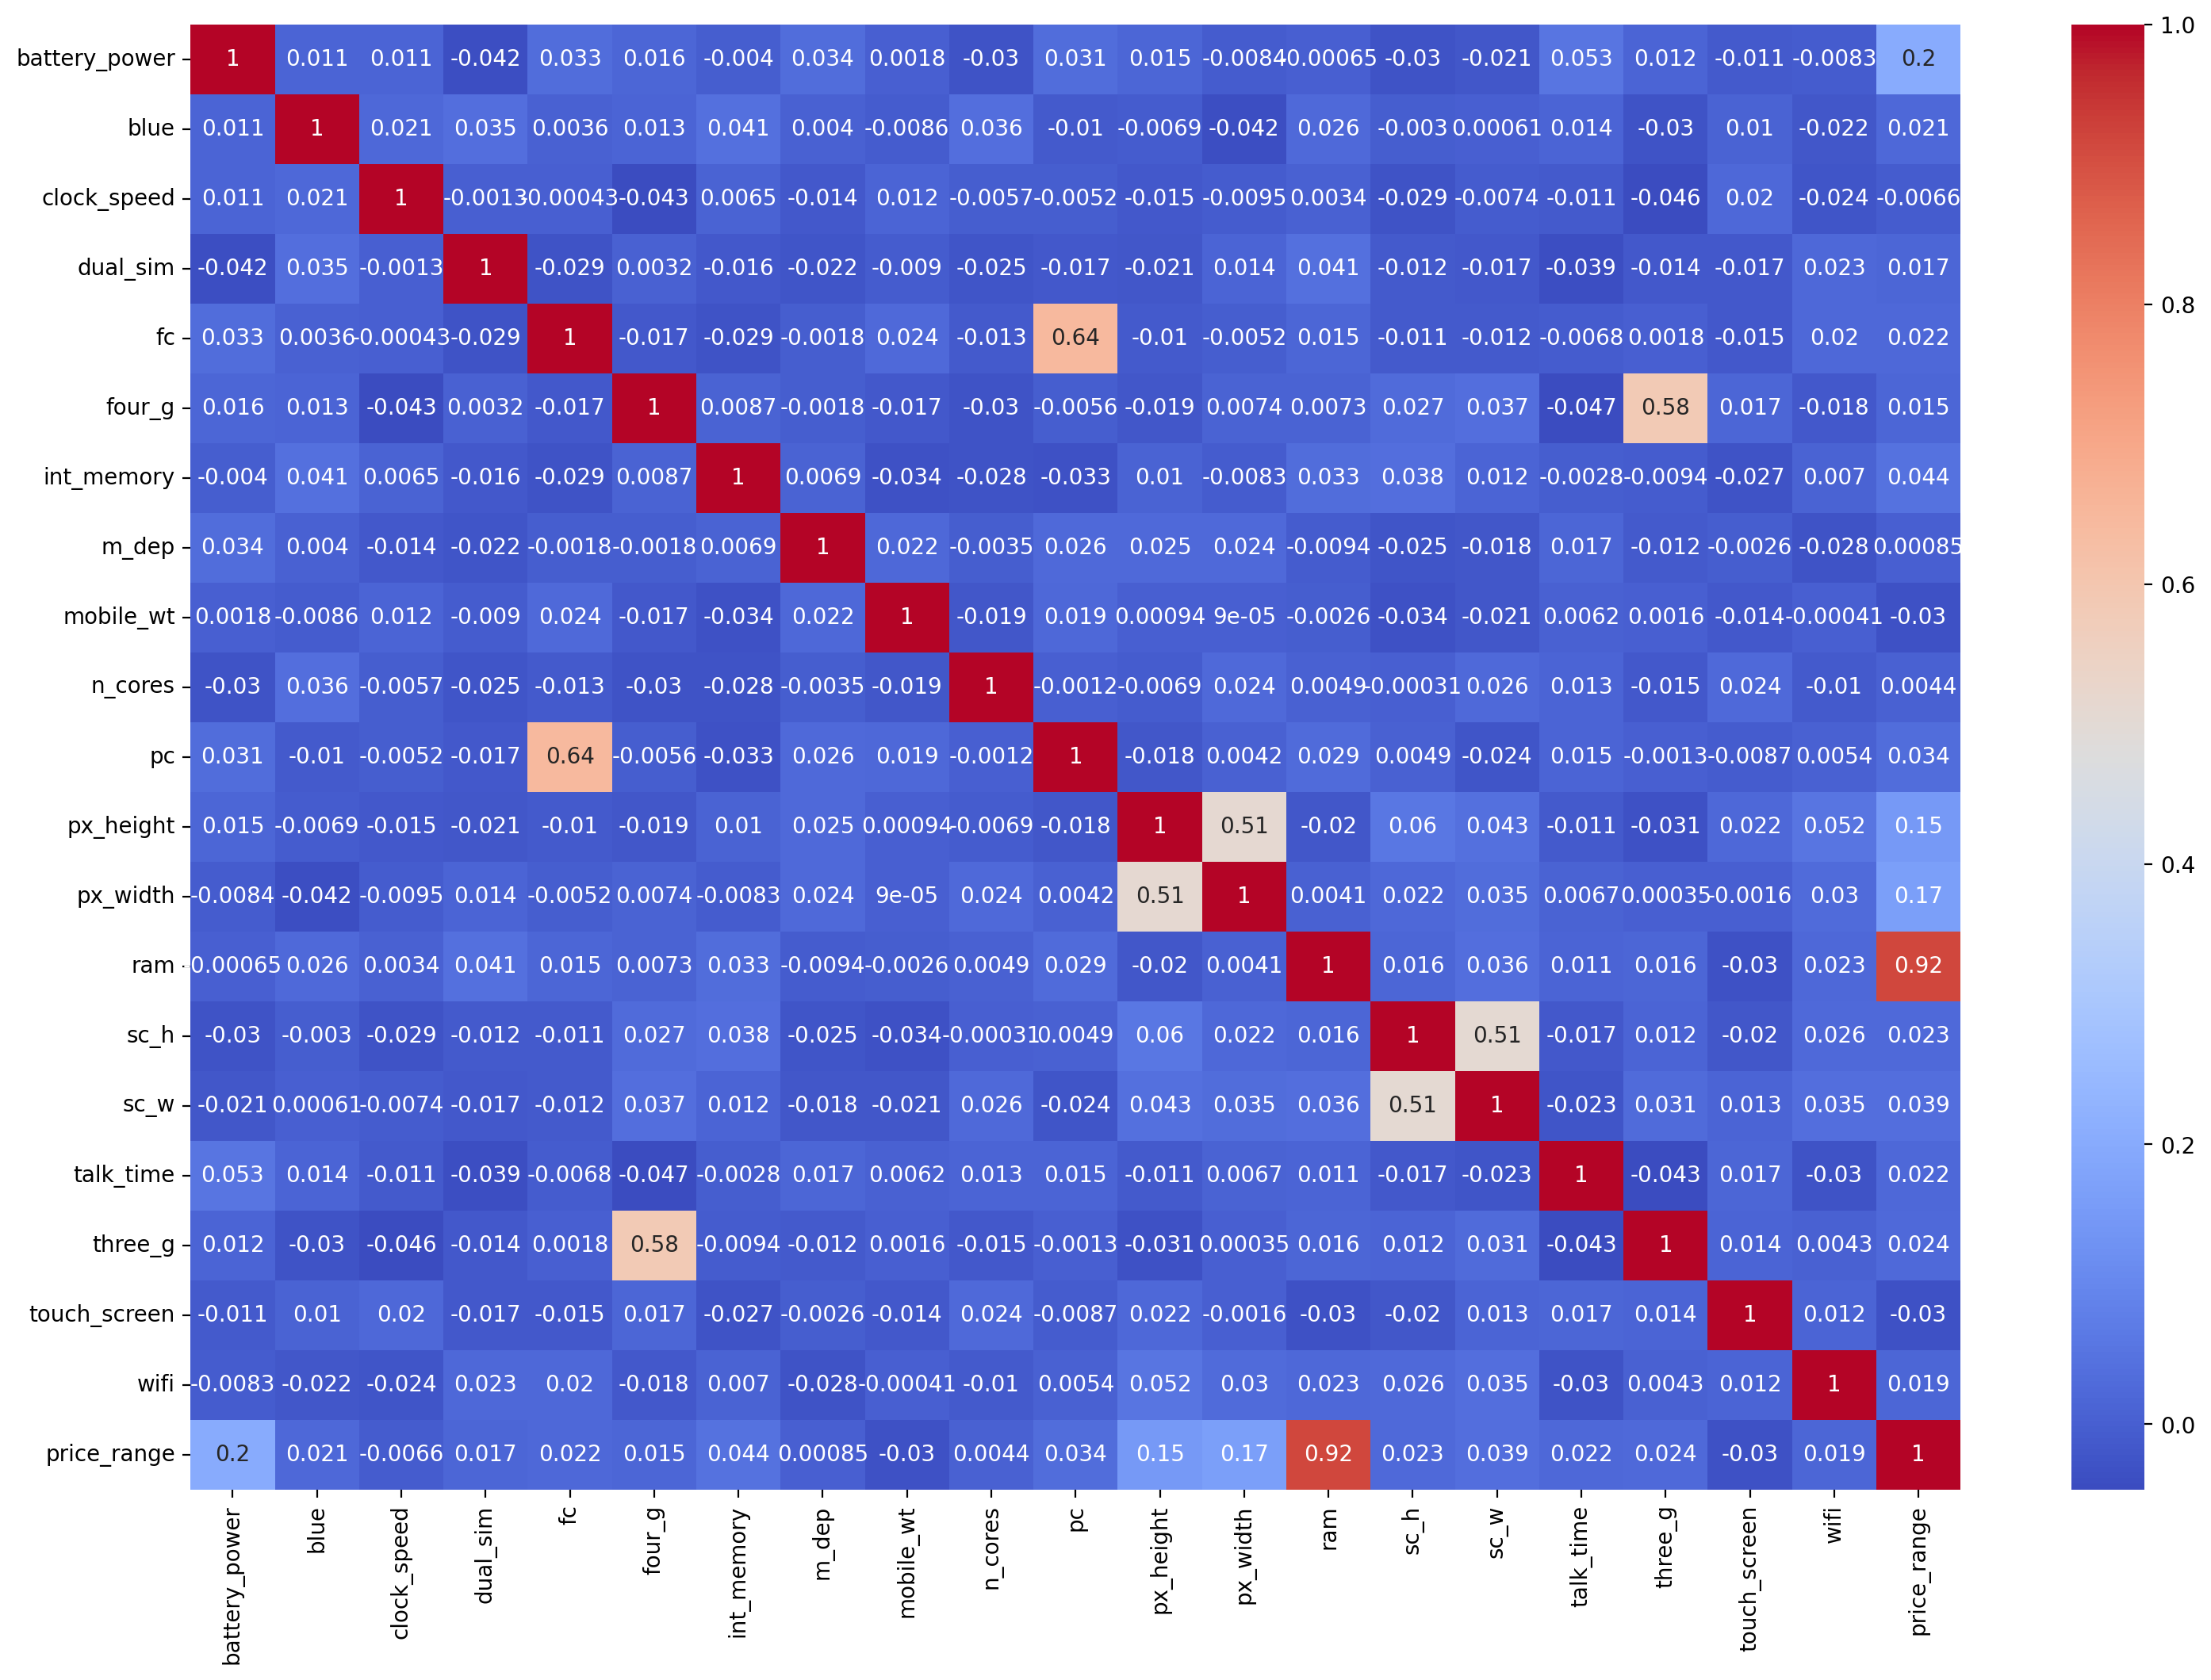

In [19]:
plt.figure(figsize=(18, 12),dpi=200)
sns.heatmap(data.corr(),cmap="coolwarm", annot=True)

<Axes: xlabel='ram', ylabel='price_range'>

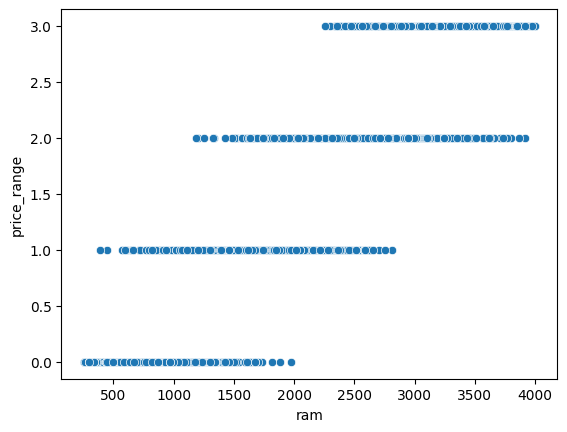

In [24]:
sns.scatterplot(data=data, x='ram', y='price_range')

## Predictive modelling

In [26]:
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from skopt import BayesSearchCV
from skopt.space import Real, Integer, Categorical

In [27]:
X=data.drop('price_range', axis=1)
y=data['price_range']

In [28]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [29]:
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)

### Logistic Regression

In [37]:
log_model=LogisticRegression()
log_params={'C': Real(0,5),
            }

In [42]:
log_bayes=BayesSearchCV(log_model, search_spaces=log_params, cv=5, n_iter=50)
log_bayes.fit(x_train, y_train)

BayesSearchCV(cv=5, estimator=LogisticRegression(),
              search_spaces={'C': Real(low=0, high=5, prior='uniform', transform='normalize')})

In [43]:
log_bayes.best_params_

OrderedDict([('C', 5.0)])

In [44]:
print(classification_report(y_train, log_bayes.predict(x_train)))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       405
           1       0.98      0.99      0.98       408
           2       0.98      0.98      0.98       401
           3       0.99      0.99      0.99       386

    accuracy                           0.99      1600
   macro avg       0.99      0.99      0.99      1600
weighted avg       0.99      0.99      0.99      1600



In [45]:
print(classification_report(y_test, log_bayes.predict(x_test)))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99        95
           1       0.98      0.95      0.96        92
           2       0.96      0.93      0.94        99
           3       0.96      0.99      0.97       114

    accuracy                           0.97       400
   macro avg       0.97      0.97      0.97       400
weighted avg       0.97      0.97      0.97       400



### Random Forest

In [46]:
random_forest=RandomForestClassifier()
rfc_search = {
    'max_features': Categorical(['sqrt', 'log2', 'auto']),
    'n_estimators': Integer(100, 500),
    'max_depth': Integer(2, 10)
}

In [47]:
forest_bayes=BayesSearchCV(random_forest, search_spaces=rfc_search, cv=5, n_iter=20)
forest_bayes.fit(x_train, y_train)

c:\Users\Emil.Javadli\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
c:\Users\Emil.Javadli\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
c:\Users\Emil.Javadli\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also t

BayesSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
              search_spaces={'max_depth': Integer(low=2, high=10, prior='uniform', transform='normalize'),
                             'max_features': Categorical(categories=('sqrt', 'log2', 'auto'), prior=None),
                             'n_estimators': Integer(low=100, high=500, prior='uniform', transform='normalize')})

In [48]:
forest_bayes.best_params_

OrderedDict([('max_depth', 9),
             ('max_features', 'sqrt'),
             ('n_estimators', 500)])

In [50]:
print(classification_report(y_train, forest_bayes.predict(x_train)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       405
           1       1.00      0.99      0.99       408
           2       0.99      1.00      1.00       401
           3       1.00      1.00      1.00       386

    accuracy                           1.00      1600
   macro avg       1.00      1.00      1.00      1600
weighted avg       1.00      1.00      1.00      1600



In [51]:
print(classification_report(y_test, forest_bayes.predict(x_test)))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97        95
           1       0.79      0.80      0.80        92
           2       0.75      0.72      0.73        99
           3       0.91      0.91      0.91       114

    accuracy                           0.85       400
   macro avg       0.85      0.85      0.85       400
weighted avg       0.85      0.85      0.85       400



### XGBoost Classifier


In [64]:
xgb_model=XGBClassifier()
xgb_params = {
    'learning_rate': Real(0.01, 5),
    'n_estimators': Integer(100, 500),
    'max_depth': Integer(3,6),
    'subsample': Real(0.5,1),
    'colsample_bytree': Real(0.5,1),
    
    }

In [65]:
xgb_bayes=BayesSearchCV(xgb_model, search_spaces=xgb_params, cv=5, n_iter=20)
xgb_bayes.fit(x_train, y_train)

BayesSearchCV(cv=5,
              estimator=XGBClassifier(base_score=None, booster=None,
                                      callbacks=None, colsample_bylevel=None,
                                      colsample_bynode=None,
                                      colsample_bytree=None,
                                      early_stopping_rounds=None,
                                      enable_categorical=False,
                                      eval_metric=None, feature_types=None,
                                      gamma=None, gpu_id=None, grow_policy=None,
                                      importance_type=None,
                                      interaction_constraints=None,
                                      learning_rate=None...
              search_spaces={'colsample_bytree': Real(low=0.5, high=1, prior='uniform', transform='normalize'),
                             'learning_rate': Real(low=0.01, high=5, prior='uniform', transform='normalize'),
                             'max_depth': Integer(low=3, high=6, prior='uniform', transform='normalize'),
                             'n_estimators': Integer(low=100, high=500, prior='uniform', transform='normalize'),
                             'subsample': Real(low=0.5, high=1, prior='uniform', transform='normalize')})

In [66]:
xgb_bayes.best_params_

OrderedDict([('colsample_bytree', 0.8649164762580733),
             ('learning_rate', 0.3860181981686684),
             ('max_depth', 5),
             ('n_estimators', 413),
             ('subsample', 0.8878197247245735)])

In [67]:
print(classification_report(y_train, xgb_bayes.predict(x_train)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       405
           1       1.00      1.00      1.00       408
           2       1.00      1.00      1.00       401
           3       1.00      1.00      1.00       386

    accuracy                           1.00      1600
   macro avg       1.00      1.00      1.00      1600
weighted avg       1.00      1.00      1.00      1600



In [68]:
print(classification_report(y_test, xgb_bayes.predict(x_test)))

              precision    recall  f1-score   support

           0       0.96      0.99      0.97        95
           1       0.93      0.89      0.91        92
           2       0.89      0.87      0.88        99
           3       0.93      0.96      0.94       114

    accuracy                           0.93       400
   macro avg       0.93      0.93      0.93       400
weighted avg       0.93      0.93      0.93       400



### Model choosing

In [73]:
pd.DataFrame(log_bayes.best_estimator_.coef_)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,-4.850878,-0.046059,-0.014724,0.032839,-0.122418,0.004142,-0.359657,0.090361,0.674799,-0.159305,0.058570,-2.799654,-2.805990,-18.827823,-0.020120,0.091515,-0.013362,0.032966,0.198350,0.322962
1,-1.599919,-0.015543,-0.048925,0.029731,0.014410,-0.000375,-0.204145,0.142462,0.320951,-0.228923,-0.092036,-0.884767,-0.974152,-6.071364,-0.111706,-0.017997,-0.077147,0.067148,0.064015,0.059423
2,1.577965,0.073693,-0.099699,-0.087463,0.017925,-0.136618,0.018466,-0.056672,-0.089191,0.046881,0.077774,0.791157,0.976710,5.965943,-0.121330,-0.013359,-0.037317,0.026935,-0.169442,-0.196292
3,4.872831,-0.012091,0.163348,0.024892,0.090083,0.132851,0.545336,-0.176151,-0.906559,0.341347,-0.044308,2.893265,2.803431,18.933245,0.253156,-0.060159,0.127827,-0.127048,-0.092923,-0.186093


In [100]:
log_features=pd.DataFrame({"Features": X.columns})

for i, class_name in enumerate(log_bayes.best_estimator_.classes_):
    log_features[class_name] = log_bayes.best_estimator_.coef_[i]


In [123]:
pd.options.display.float_format = '{:.2f}'.format
log_features.sort_values(by=3)

,Features,0,1,2,3
8,mobile_wt,0.67,0.32,-0.09,-0.91
19,wifi,0.32,0.06,-0.20,-0.19
7,m_dep,0.09,0.14,-0.06,-0.18
17,three_g,0.03,0.07,0.03,-0.13
18,touch_screen,0.20,0.06,-0.17,-0.09
15,sc_w,0.09,-0.02,-0.01,-0.06
10,pc,0.06,-0.09,0.08,-0.04
1,blue,-0.05,-0.02,0.07,-0.01
3,dual_sim,0.03,0.03,-0.09,0.02
4,fc,-0.12,0.01,0.02,0.09


In [125]:
# For low cost class
low_cost=log_features.sort_values(by=0)
fig=px.bar(low_cost, x='Features', y=0, 
           title="Coefficients for low cost class", labels={"0": 'Coefficient'})
fig.show()

In [120]:
# For medium cost class
medium_cost=log_features.sort_values(by=1)
fig=px.bar(medium_cost, x='Features', y=1, 
           title="Coefficients for medium cost class", labels={"1": 'Coefficient'})
fig.show()

In [121]:
# For high cost class
high_cost=log_features.sort_values(by=2)
fig=px.bar(high_cost, x='Features', y=2, 
           title="Coefficients for high cost class", labels={"2": 'Coefficient'})
fig.show()

In [122]:
# For very high cost class
very_high=log_features.sort_values(by=3)
fig=px.bar(very_high, x='Features', y=3, 
           title="Coefficients for very high cost class", labels={"3": 'Coefficient'})
fig.show()